<a href="https://colab.research.google.com/github/rexwotan-A01840088/Ciencia-y-Analitica-de-datos/blob/main/Actividad6FE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC5053 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 6**
Ingeniería de características (FE)

---

*   NOMBRE: Rex Wotan Dominguez Chang
*   MATRÍCULA: A01840088

En esta actividad trabajarás con el archivo `computer_prices.csv`, basado en un conjunto de datos sobre características técnicas y especificaciones de computadoras portátiles y de escritorio, disponible en Kaggle.

Los datos fueron recopilados para analizar el rendimiento y el precio de los dispositivos, e incluyen información sobre hardware, almacenamiento, conectividad y otras especificaciones técnicas. Los indicadores incluidos son:

* `device_type`: Tipo de dispositivo (ej. laptop, desktop)
* `brand`: Marca del dispositivo
* `model`: Modelo del dispositivo
* `release_year`: Año de lanzamiento del dispositivo
* `os`: Sistema operativo instalado
* `form_factor`: Factor de forma o diseño del dispositivo (ej. laptop, ultrabook, desktop tower)
* `cpu_brand`: Marca del procesador
* `cpu_tier`: Nivel o gama del procesador, ordinal del 1 al 6 según desempeño
* `cpu_cores`: Número de núcleos del procesador
* `cpu_threads`: Número de hilos de ejecución del procesador
* `gpu_brand`: Marca de la tarjeta gráfica
* `gpu_model`: Modelo específico de la tarjeta gráfica
* `gpu_tier`: Nivel o gama de la GPU, ordinal del 1 al 6 según desempeño
* `vram_gb`: Memoria de video de la GPU en gigabytes
* `ram_gb`: Memoria RAM del dispositivo en gigabytes
* `storage_type`: Tipo de almacenamiento (ej. HDD, SSD)
* `storage_gb`: Capacidad de almacenamiento en gigabytes
* `storage_drive_count`: Número de unidades de almacenamiento instaladas
* `display_type`: Tipo de pantalla (ej. IPS, TN, OLED)
* `charger_watts`: Potencia del cargador (en watts) para laptops
* `psu_watts`: Potencia de la fuente de poder (en watts) para desktops
* `wifi`: Estándar de conectividad Wi-Fi (ej. Wi-Fi 5, 6, 6E, 7)
* `bluetooth`: Versión de Bluetooth
* `weight_kg`: Peso del dispositivo en kilogramos
* `warranty_months`: Meses de garantía del dispositivo
* `price`: Precio del dispositivo. Es la variable de salida o *target*, es decir, la que se pretende predecir más adelante al construir el modelo.

**NOTA IMPORTANTE:** Asegúrate de responder *explícitamente* todos los cuestionamientos.

In [1]:
# Instalar las bibliotecas necesarias
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.4 MB/s eta 0:00:00


In [2]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
from scipy.stats import probplot
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import FunctionTransformer, PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from category_encoders.binary import BinaryEncoder

1. Descarga el archivo: `computer_prices.csv` y guarda, en un dataframe (`compu_df`), todos sus registros.
* Utiliza el método `info()` del dataframe, para obtener el resumen de los tipos de datos. ¿Cuántas columnas son numéricas y cuántas de texto?
* Determina la cantidad de valores únicos por columna.
* Elimina las variables:
  * `model`: Debido a su altísima cardinalidad, lo que dificulta su uso en análisis y modelado.
  * `cpu_model`: Además de su elevada cardinalidad, su información ya está representada de manera implícita en otras variables como: `cpu_tier`, `cpu_cores` y `cpu_threads`

In [7]:
import os
import io
import pandas as pd
import numpy as np

def cargar_computer_prices():
    posibles_rutas = ["computer_prices.csv", "/content/computer_prices.csv"]
    ruta_encontrada = None
    for p in posibles_rutas:
        if os.path.exists(p):
            ruta_encontrada = p
            break

    if ruta_encontrada is not None:
        try:
            df = pd.read_csv(ruta_encontrada, encoding="utf-8-sig",
                             low_memory=False, on_bad_lines="skip")
        except UnicodeDecodeError:
            df = pd.read_csv(ruta_encontrada, encoding="latin-1",
                             low_memory=False, on_bad_lines="skip")
        return df, ruta_encontrada


print("=== Resumen de tipos (DataFrame.info) ===")
compu_df.info(memory_usage="deep")

num_cols  = compu_df.select_dtypes(include=np.number).columns
text_cols = compu_df.select_dtypes(include=["object", "string", "category"]).columns
dt_cols   = compu_df.select_dtypes(include=["datetime64[ns]", "datetimetz"]).columns
bool_cols = compu_df.select_dtypes(include=["bool"]).columns

print("\n=== Conteo por tipo lógico ===")
print(f"Columnas numéricas: {len(num_cols)}")
print(f"Columnas de texto (object/string/category): {len(text_cols)}")
print(f"Columnas datetime: {len(dt_cols)}")
print(f"Columnas booleanas: {len(bool_cols)}\n")

unique_counts = compu_df.nunique(dropna=True).sort_values(ascending=False)
print("=== Valores únicos por columna (excluye NaN) ===")
print(unique_counts.to_string())
print()

cols_a_eliminar = [c for c in ["model", "gpu_model"] if c in compu_df.columns]
compu_df.drop(columns=cols_a_eliminar, inplace=True, errors="ignore")

if cols_a_eliminar:
    print(f"🗑️ Columnas eliminadas: {cols_a_eliminar}")
else:
    print("ℹ️ Las columnas 'model' y/o 'cpu_model' no estaban presentes.")

print(f"🔁 Nuevo shape tras eliminación: {compu_df.shape[0]} filas × {compu_df.shape[1]} columnas\n")


=== Resumen de tipos (DataFrame.info) ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   device_type          100000 non-null  object 
 1   brand                100000 non-null  object 
 2   release_year         100000 non-null  int64  
 3   os                   100000 non-null  object 
 4   form_factor          100000 non-null  object 
 5   cpu_brand            100000 non-null  object 
 6   cpu_tier             100000 non-null  int64  
 7   cpu_cores            100000 non-null  int64  
 8   cpu_threads          100000 non-null  int64  
 9   gpu_brand            100000 non-null  object 
 10  gpu_model            100000 non-null  object 
 11  gpu_tier             100000 non-null  int64  
 12  vram_gb              100000 non-null  int64  
 13  ram_gb               100000 non-null  int64  
 14  storage_type         100000

2. Antes de iniciar con el análisis univariado, verifica si hay valores duplicados y/o faltantes.
* Obtén las estadísticas descriptivas, separado las numéricas y las categóricas. De estas últimas incluye las tablas de frecuencia.
* Genera histogramas para las numéricas y diagramas de barras para las categóricas. Con alta cardinalidad, sólo incluye los 10 valores más frecuentes.

✅ compu_df listo. Shape: 100000 filas × 24 columnas
ℹ️ 'model' y/o 'cpu_model' no estaban presentes (nada que eliminar).

🔎 Filas duplicadas (completas): 0

=== Resumen de faltantes por columna ===


,mensaje
0,No hay valores faltantes.



=== Columnas numéricas ===
['release_year', 'cpu_tier', 'cpu_cores', 'cpu_threads', 'gpu_tier', 'vram_gb', 'ram_gb', 'storage_gb', 'storage_drive_count', 'charger_watts', 'psu_watts', 'bluetooth', 'weight_kg', 'warranty_months', 'price']

=== Columnas categóricas ===
['device_type', 'brand', 'os', 'form_factor', 'cpu_brand', 'gpu_brand', 'storage_type', 'display_type', 'wifi']

📊 Estadísticas descriptivas (numéricas)


,count,mean,std,min,25%,50%,75%,max,p1,p5,p95,p99,n_faltantes
release_year,100000.0,2022.320850,2.025761,2018.00,2021.00,2023.00,2024.00,2025.00,2018.00,2018.00,2025.00,2025.00,0
cpu_tier,100000.0,3.153490,1.373175,1.00,2.00,3.00,4.00,6.00,1.00,1.00,5.00,6.00,0
cpu_cores,100000.0,10.515740,5.044092,4.00,6.00,8.00,14.00,28.00,4.00,4.00,20.00,26.00,0
cpu_threads,100000.0,19.372700,9.718426,4.00,12.00,16.00,24.00,56.00,6.00,8.00,36.00,52.00,0
gpu_tier,100000.0,2.991350,1.459643,1.00,2.00,3.00,4.00,6.00,1.00,1.00,6.00,6.00,0
vram_gb,100000.0,6.152180,3.964926,0.00,4.00,6.00,8.00,16.00,0.00,0.00,12.00,16.00,0
ram_gb,100000.0,39.706400,31.902684,8.00,16.00,32.00,64.00,144.00,8.00,8.00,96.00,128.00,0
storage_gb,100000.0,903.936000,774.243654,256.00,512.00,512.00,1024.00,4096.00,256.00,256.00,2048.00,4096.00,0
storage_drive_count,100000.0,1.524980,0.797284,1.00,1.00,1.00,2.00,4.00,1.00,1.00,3.00,4.00,0
charger_watts,100000.0,61.383450,62.795034,0.00,0.00,65.00,90.00,240.00,0.00,0.00,180.00,240.00,0



📊 Estadísticas descriptivas (categóricas)


,count,unique,top,freq
device_type,100000,2,Laptop,59844
brand,100000,10,Lenovo,15992
os,100000,4,Windows,71817
form_factor,100000,10,Mainstream,17819
cpu_brand,100000,3,Intel,52774
gpu_brand,100000,4,NVIDIA,54712
storage_type,100000,4,NVMe,45059
display_type,100000,6,LED,32000
wifi,100000,4,Wi-Fi 6,46149



📋 Tablas de frecuencia por variable categórica

— device_type (niveles: 2)


,device_type,frecuencia,proporcion
0,Laptop,59844,0.5984
1,Desktop,40156,0.4016



— brand (niveles: 10)


,brand,frecuencia,proporcion
0,Lenovo,15992,0.1599
1,HP,14114,0.1411
2,Dell,14005,0.14
3,Apple,11915,0.1192
4,ASUS,10159,0.1016
5,Acer,9925,0.0992
6,Samsung,8066,0.0807
7,MSI,7891,0.0789
8,Gigabyte,4900,0.049
9,Razer,3033,0.0303



— os (niveles: 4)


,os,frecuencia,proporcion
0,Windows,71817,0.7182
1,macOS,18207,0.1821
2,Linux,6109,0.0611
3,ChromeOS,3867,0.0387



— form_factor (niveles: 10)


,form_factor,frecuencia,proporcion
0,Mainstream,17819,0.1782
1,Gaming,16876,0.1688
2,ATX,15597,0.156
3,Ultrabook,13236,0.1324
4,Micro-ATX,8672,0.0867
5,Full-Tower,7110,0.0711
6,2-in-1,7049,0.0705
7,SFF,5585,0.0558
8,Workstation,4864,0.0486
9,Mini-ITX,3192,0.0319



— cpu_brand (niveles: 3)


,cpu_brand,frecuencia,proporcion
0,Intel,52774,0.5277
1,AMD,35311,0.3531
2,Apple,11915,0.1192



— gpu_brand (niveles: 4)


,gpu_brand,frecuencia,proporcion
0,NVIDIA,54712,0.5471
1,Apple,18922,0.1892
2,AMD,15767,0.1577
3,Intel,10599,0.106



— storage_type (niveles: 4)


,storage_type,frecuencia,proporcion
0,NVMe,45059,0.4506
1,SSD,24937,0.2494
2,HDD,15023,0.1502
3,Hybrid,14981,0.1498



— display_type (niveles: 6)


,display_type,frecuencia,proporcion
0,LED,32000,0.32
1,OLED,21910,0.2191
2,IPS,17742,0.1774
3,Mini-LED,12188,0.1219
4,QLED,10069,0.1007
5,VA,6091,0.0609



— wifi (niveles: 4)


,wifi,frecuencia,proporcion
0,Wi-Fi 6,46149,0.4615
1,Wi-Fi 6E,25923,0.2592
2,Wi-Fi 5,19926,0.1993
3,Wi-Fi 7,8002,0.08


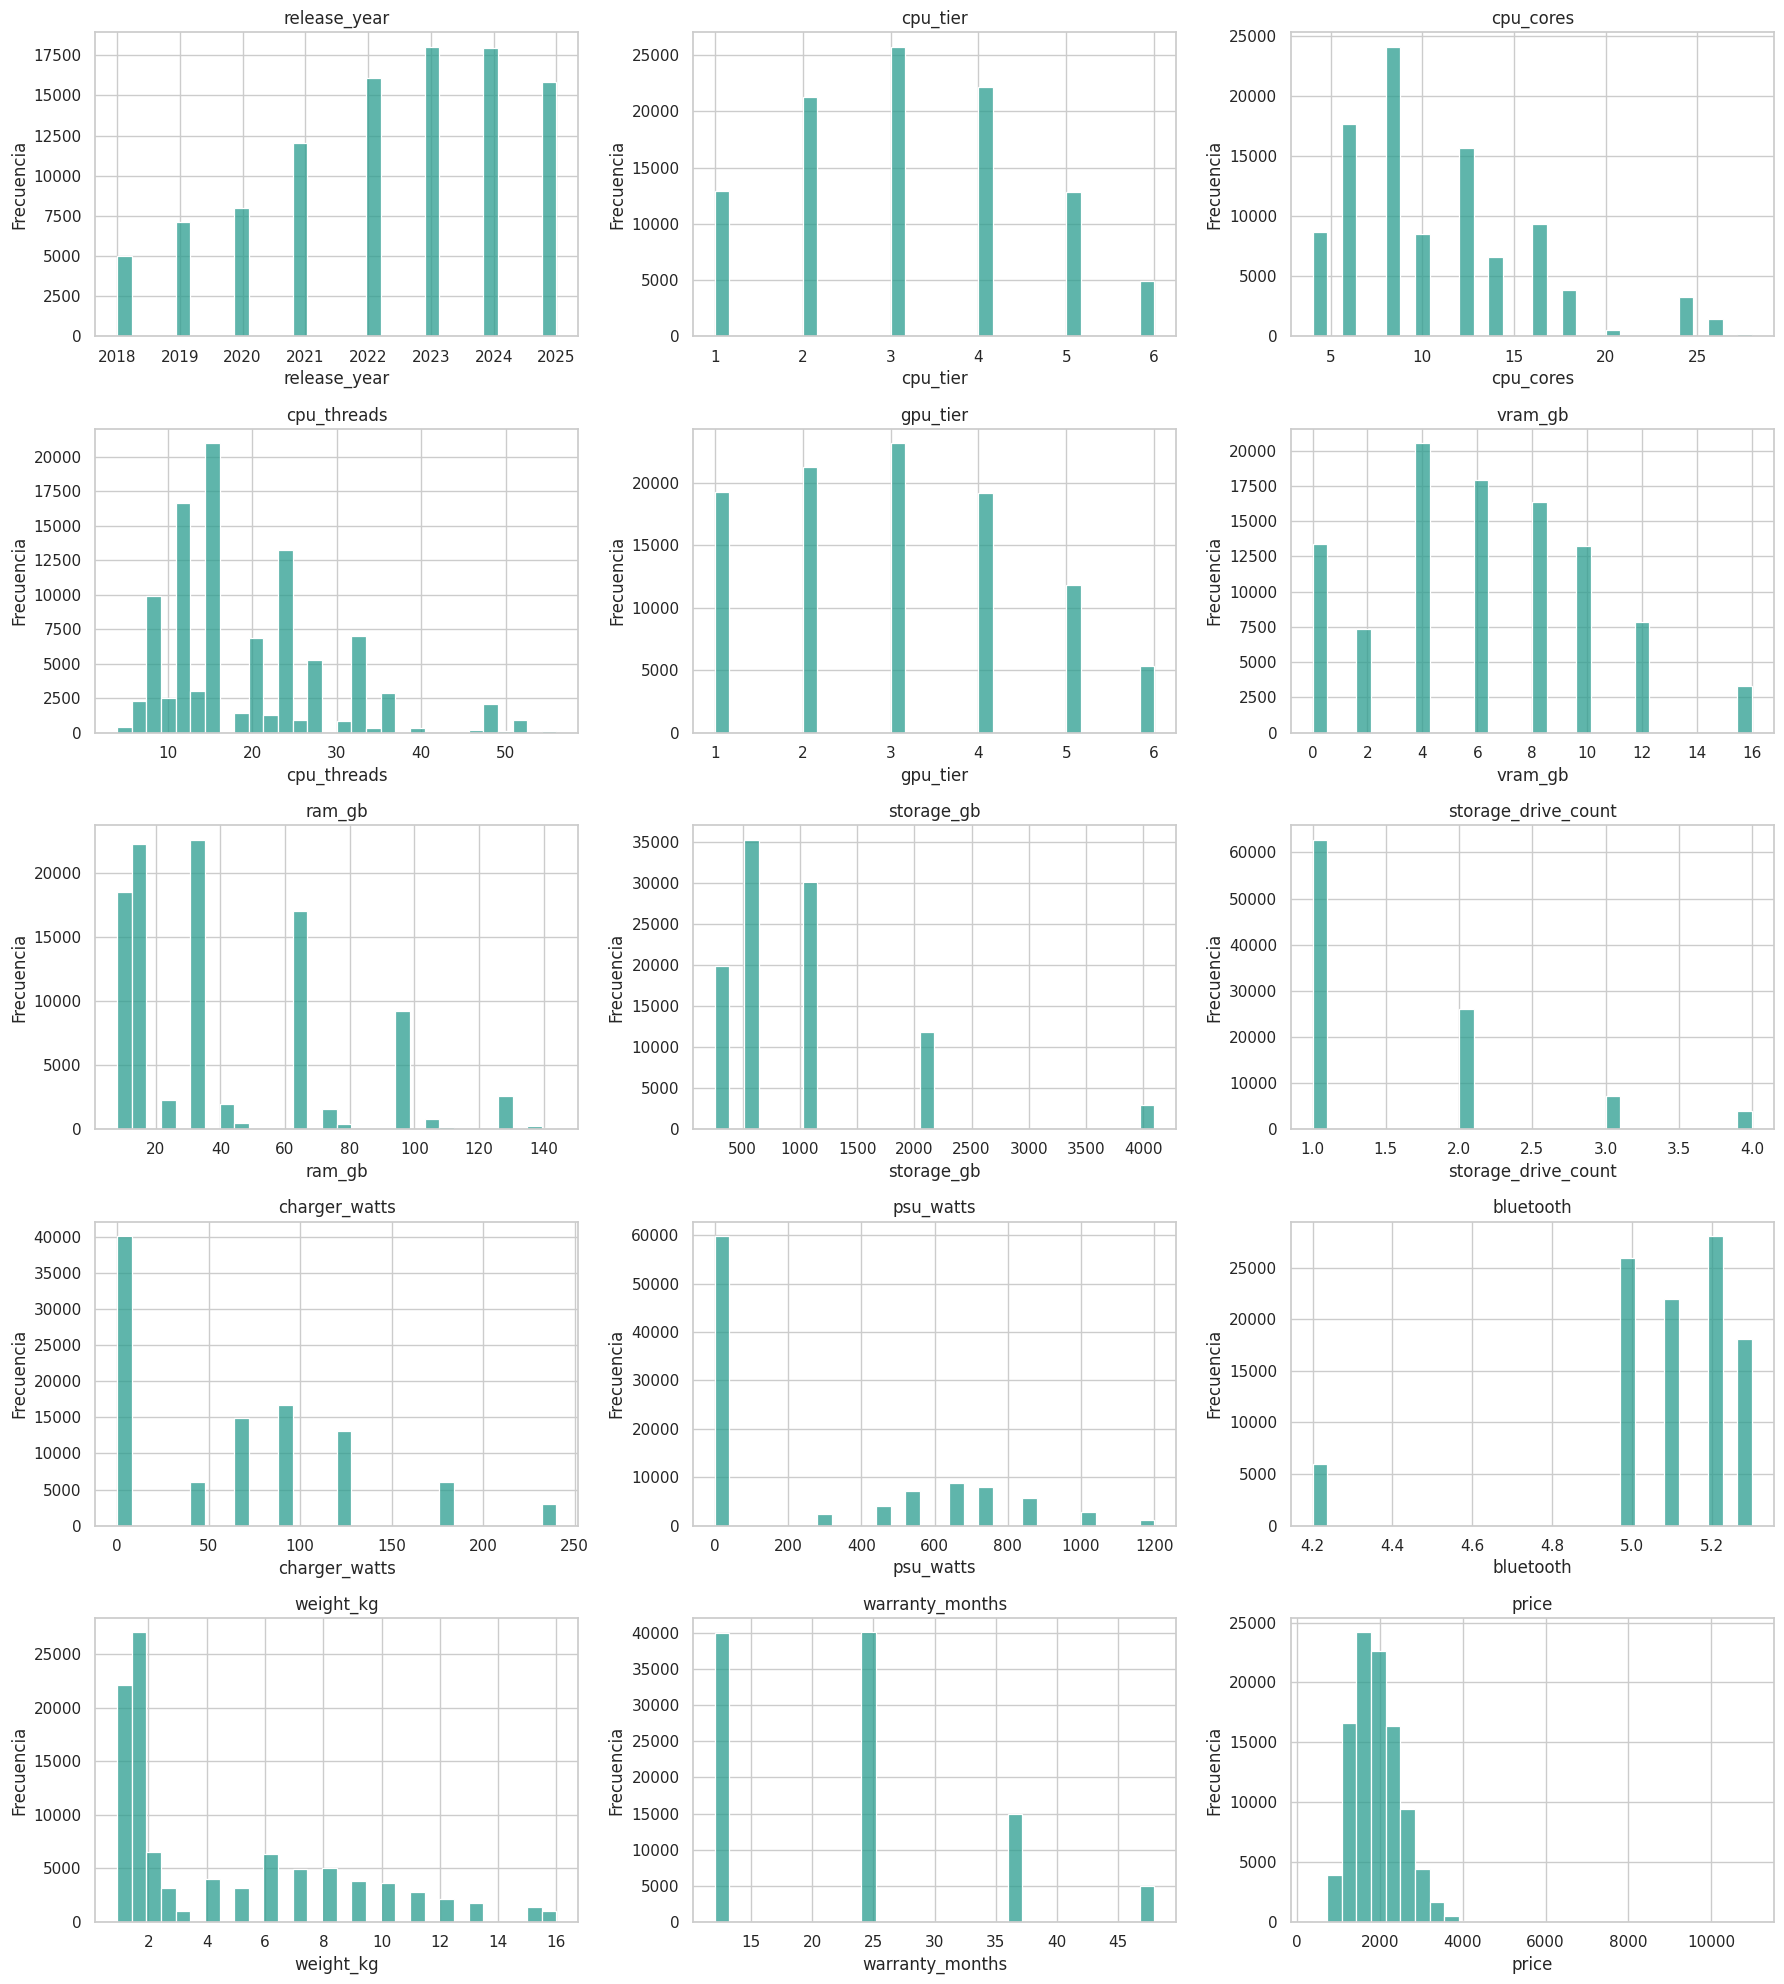

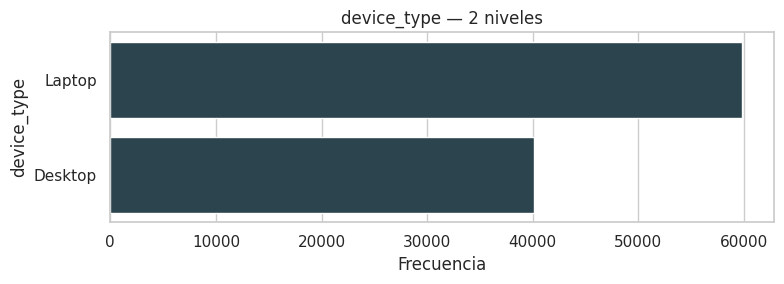

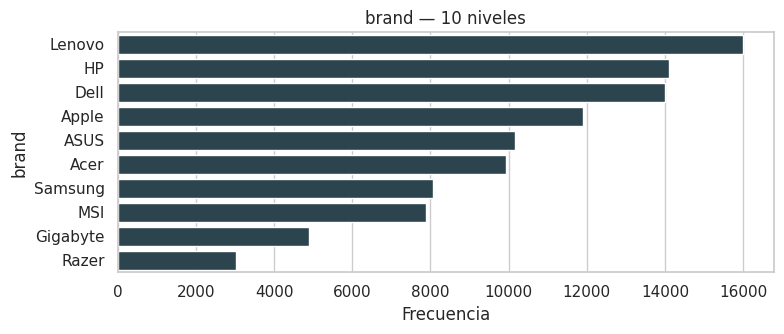

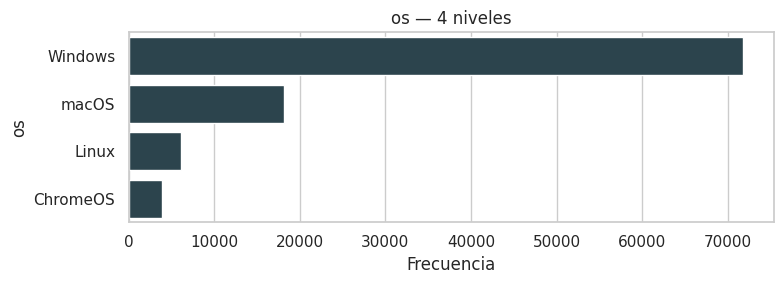

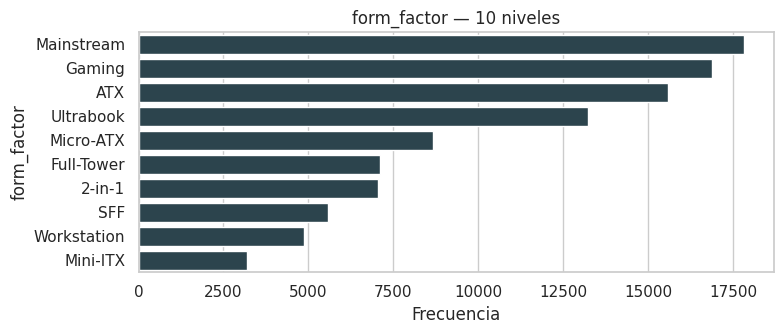

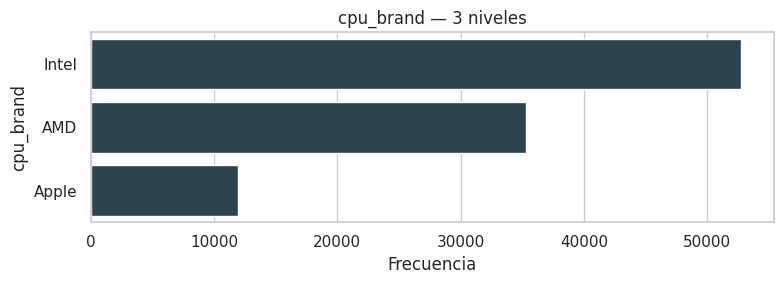

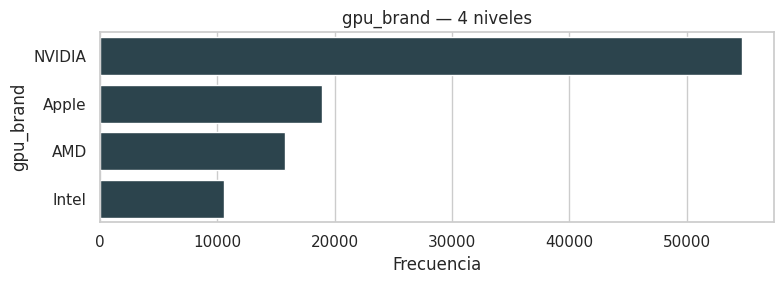

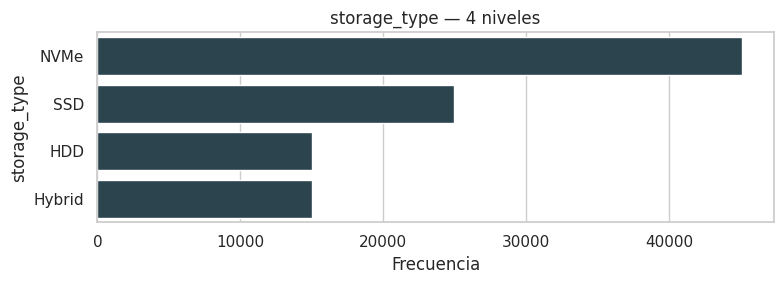

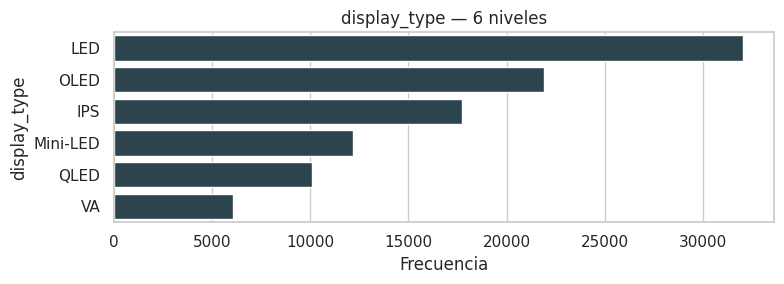

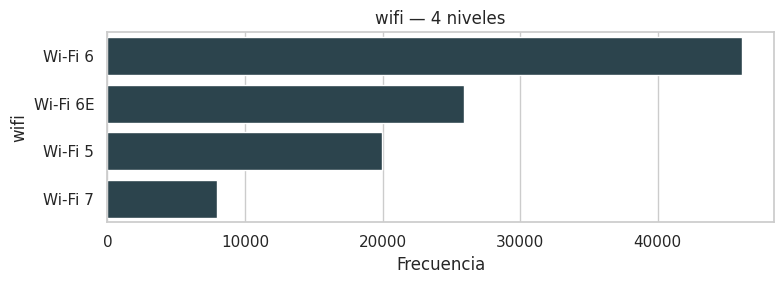


✅ Análisis univariado preliminar completado (duplicados, faltantes, descriptivos y visualizaciones).


In [9]:
import os
import io
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

if 'compu_df' not in globals():
    posibles_rutas = ["computer_prices.csv", "/content/computer_prices.csv"]
    ruta = next((p for p in posibles_rutas if os.path.exists(p)), None)

    if ruta is None:
        try:
            from google.colab import files
            print("No se encontró 'computer_prices.csv'. Sube el archivo cuando se abra el diálogo.")
            uploaded = files.upload()
            if "computer_prices.csv" in uploaded:
                raw = uploaded["computer_prices.csv"]
                nombre = "computer_prices.csv"
            else:
                nombre = next(iter(uploaded.keys()))
                raw = uploaded[nombre]
                print(f"⚠️ No se encontró 'computer_prices.csv'; usando: {nombre}")
            try:
                compu_df = pd.read_csv(io.BytesIO(raw), encoding="utf-8-sig",
                                       low_memory=False, on_bad_lines="skip")
            except UnicodeDecodeError:
                compu_df = pd.read_csv(io.BytesIO(raw), encoding="latin-1",
                                       low_memory=False, on_bad_lines="skip")
        except ImportError:
            raise RuntimeError("Ejecuta esto en Colab o asegura que 'computer_prices.csv' exista en el directorio.")
    else:
        try:
            compu_df = pd.read_csv(ruta, encoding="utf-8-sig",
                                   low_memory=False, on_bad_lines="skip")
        except UnicodeDecodeError:
            compu_df = pd.read_csv(ruta, encoding="latin-1",
                                   low_memory=False, on_bad_lines="skip")

print(f"✅ compu_df listo. Shape: {compu_df.shape[0]} filas × {compu_df.shape[1]} columnas")


cols_a_eliminar = [c for c in ["model", "cpu_model"] if c in compu_df.columns]
if cols_a_eliminar:
    compu_df.drop(columns=cols_a_eliminar, inplace=True, errors="ignore")
    print(f"🗑️ Columnas eliminadas: {cols_a_eliminar}")
else:
    print("ℹ️ 'model' y/o 'cpu_model' no estaban presentes (nada que eliminar).")


dup_total = compu_df.duplicated().sum()
print(f"\n🔎 Filas duplicadas (completas): {dup_total}")
if dup_total > 0:
    print("   Sugerencia: compu_df = compu_df.drop_duplicates().")

missing_counts = compu_df.isna().sum()
missing_pct = (missing_counts / len(compu_df) * 100).round(2)
missing_summary = pd.DataFrame({
    "faltantes": missing_counts,
    "%_faltantes": missing_pct
}).sort_values(by="faltantes", ascending=False)

print("\n=== Resumen de faltantes por columna ===")
display(missing_summary[missing_summary["faltantes"] > 0] if missing_summary["faltantes"].sum() > 0 else
        pd.DataFrame({"mensaje": ["No hay valores faltantes."]}))


num_cols  = compu_df.select_dtypes(include=np.number).columns.tolist()
cat_cols  = compu_df.select_dtypes(include=["object", "string", "category"]).columns.tolist()

print("\n=== Columnas numéricas ===")
print(num_cols if num_cols else "No se hallaron columnas numéricas.")
print("\n=== Columnas categóricas ===")
print(cat_cols if cat_cols else "No se hallaron columnas categóricas.")


if num_cols:
    desc_num = compu_df[num_cols].describe().T
    percentiles = compu_df[num_cols].quantile([0.01, 0.05, 0.95, 0.99]).T
    percentiles.columns = [f"p{int(p*100)}" for p in [0.01, 0.05, 0.95, 0.99]]
    n_miss = compu_df[num_cols].isna().sum().rename("n_faltantes")
    desc_num = desc_num.join(percentiles, how="left").join(n_miss, how="left")
    print("\n📊 Estadísticas descriptivas (numéricas)")
    display(desc_num)

if cat_cols:

    desc_cat = compu_df[cat_cols].describe().T  # count, unique, top, freq
    print("\n📊 Estadísticas descriptivas (categóricas)")
    display(desc_cat)


    print("\n📋 Tablas de frecuencia por variable categórica")
    freq_tables = {}
    high_card_threshold = 15   # si supera este umbral, mostramos solo Top-N
    top_n = 10

    for col in cat_cols:
        vc = compu_df[col].astype("string").fillna("<NA>").value_counts(dropna=False)
        total = vc.sum()
        nunique = vc.size
        if nunique > high_card_threshold:
            vc_display = vc.head(top_n)
            title_suffix = f"(alta cardinalidad: {nunique} niveles, mostrando Top {top_n})"
        else:
            vc_display = vc
            title_suffix = f"(niveles: {nunique})"

        freq_df = pd.DataFrame({
            col: vc_display.index,
            "frecuencia": vc_display.values,
            "proporcion": (vc_display.values / total).round(4)
        })
        freq_tables[col] = freq_df

        print(f"\n— {col} {title_suffix}")
        display(freq_df)

sns.set(style="whitegrid")

if num_cols:
    n = len(num_cols)
    ncols = 3
    nrows = math.ceil(n / ncols)
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(6*ncols, 4*nrows))
    axes = np.array(axes).reshape(nrows, ncols)

    for i, col in enumerate(num_cols):
        r, c = divmod(i, ncols)
        ax = axes[r, c]
        data = compu_df[col].dropna()

        if data.size == 0 or data.nunique() <= 1:
            ax.text(0.5, 0.5, "Sin variación / sin datos", ha="center", va="center")
            ax.set_title(col)
            ax.axis("off")
            continue
        sns.histplot(data, bins=30, kde=False, ax=ax, color="#2a9d8f")
        ax.set_title(col)
        ax.set_xlabel(col)
        ax.set_ylabel("Frecuencia")

    for j in range(n, nrows*ncols):
        r, c = divmod(j, ncols)
        axes[r, c].axis("off")

    plt.tight_layout()
    plt.show()

if cat_cols:
    top_n = 10
    high_card_threshold = 15
    for col in cat_cols:
        vc = compu_df[col].astype("string").fillna("<NA>").value_counts(dropna=False)
        nunique = vc.size
        if nunique > high_card_threshold:
            vc_plot = vc.head(top_n)
            titulo = f"{col} — Top {top_n} de {nunique} niveles"
        else:
            vc_plot = vc
            titulo = f"{col} — {nunique} niveles"

        plt.figure(figsize=(8, max(3, min(0.35*len(vc_plot), 10))))
        sns.barplot(x=vc_plot.values, y=vc_plot.index, orient="h", color="#264653")
        plt.title(titulo)
        plt.xlabel("Frecuencia")
        plt.ylabel(col)
        plt.tight_layout()
        plt.show()

print("\n✅ Análisis univariado preliminar completado (duplicados, faltantes, descriptivos y visualizaciones).")

3. Dibuja un mapa de calor con la matriz de correlación para las variables numéricas del conjunto de datos.
* Identifica los pares de variables cuya correlación sea superior a 0.9 e imprímelos.
* Reflexiona sobre cuáles variables representan de manera general la capacidad del hardware y mantenlas; elimina las demás por aportar información redundante.
* Incluye una breve justificación de tus decisiones.

4. Para comenzar con la ingeniería de características, crea una copia del dataframe y asígnala a un nuevo objeto llamado `compu_trans`.
* Calcula cuántos años han pasado desde el lanzamiento de cada computadora y almacénalo en una nueva columna llamada `years_since_release`; luego, elimina la columna original.
* Utiliza `KBinsDiscretizer` para reemplazar la columna `vram_gb` en 4 bins ordinales basados en cuantiles.
* Imprime los valores que delimitan cada bin y haz un histograma para ver la cantidad de observaciones en cada uno, con el fin de entender cómo se agruparon los datos.

5. Observa los histogramas del ejercicio 2. Notarás que en las variables `charger_watts` y `psu_watts` aparece una barra en 0. Analiza por qué ocurre esto y qué significa en relación con el tipo de dispositivo.
* Como estas variables son mutuamente excluyentes, combínalas en una nueva columna llamada `power_watts` que contenga la potencia correspondiente de cada dispositivo y, a continuación, haz un histograma para verificar que la distribución resultante es bimodal.
* Por último, borra las columnas originales `charger_watts` y `psu_watts`.

6. Para disminuir el sesgo de la variable `price`, crea tres transformadores: logaritmo, raíz cuadrada y Box - Cox.
* Aplica cada transformador a la variable price, dejando el resultado en variables temporales. El objetivo es comparar los efectos de cada transformación antes de decidir cuál aplicar de manera definitiva sobre las variables continuas del dataframe.
* De la variable original y de cada una de las tres transformaciones se debe mostrar:
  * Histograma: para observar la distribución de los datos.
  * Boxplot: para identificar posibles valores atípicos.
  * Q-Q plot: para evaluar la normalidad de la variable.
  * Skew (sesgo): para cuantificar la asimetría de la distribución.
  * Cantidad de outliers: para conocer cuántos valores extremos existen.
* En función de los resultados obtenidos al comparar las transformaciones, decide cuál logró el mejor efecto sobre la distribución de la variable y aplícala directamente en el dataframe, reemplazando las variables continuas: `weight_kg`, `power_watts` y `price`.

7. Para que todas las variables numéricas estén en la misma escala, aplica `MinMaxScaler` de sklearn a todas las columnas numéricas del dataframe, reemplazando las columnas originales.

8. Aunque `wifi` es una variable categórica, sus categorías tienen un orden natural (Wi-Fi 5 < Wi-Fi 6 < Wi-Fi 6E < Wi-Fi 7). Codifícala usando `OrdinalEncoder`.
* Luego, escala la variable codificada entre 0 y 1 con `MinMaxScaler`, para que quede en la misma escala que las variables numéricas del dataframe.

Nota: Ambos cambios deben efectuarse sobre la columna original, de manera que quede una única columna `wifi` con toda la información transformada.

9. La variable `gpu_model` tiene muchas categorías. Usar *One-Hot Encoding* aumentaría significativamente la dimensionalidad del dataframe. Por ello, utiliza `BinaryEncoder` para codificarla.
* Guarda el resultado en un dataframe llamado `bin_df`. Más adelante, lo combinarás con `compu_transf` para integrar las variables codificadas.

10. Usa `OneHotEncoder` para codificar las variables categóricas restantes. Asegúrate de usar `drop='first'` para evitar la multicolinealidad y guarda el resultado en un dataframe llamado `ohe_df`
* Combina el dataframe `compu_transf` con las variables categóricas que fueron codificadas en `bin_df` y `ohe_df`. No olvides eliminar las variables originales.
* Usa `describe()` sobre el dataframe resultante para corroborar que todas las columnas estén escaladas entre 0 y 1 y que no queden variables categóricas sin codificar.